In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import g3py as g3


g3.style_seaborn()
g3.style_widget()

x, y = g3.load_sunspots()
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.35)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 108 (34.95145631067961%)


In [2]:
gp = g3.GaussianProcess(x, g3.Zero(), g3.SE(x))

Space Dimensions:  (309, 1)
Definition OK
Compilation OK


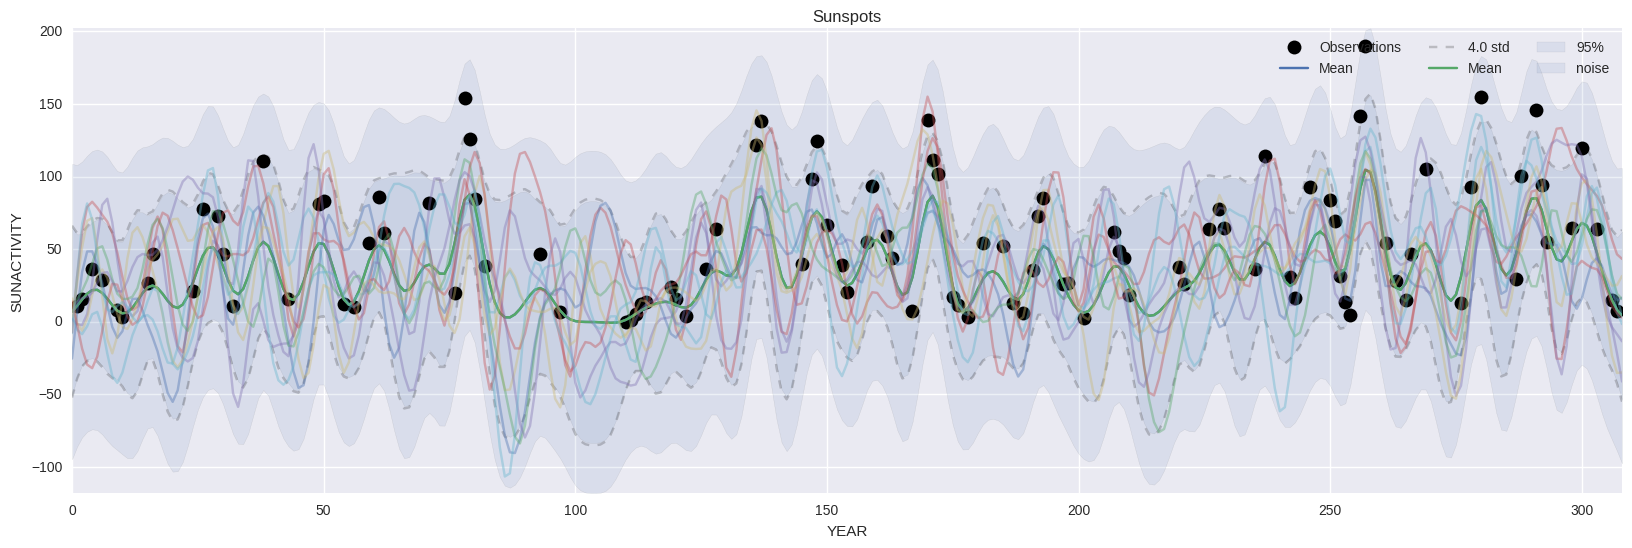

In [3]:
gp.describe('Sunspots','YEAR','SUNACTIVITY')
gp.observed(x_obs, y_obs)
gp.plot(samples=10)

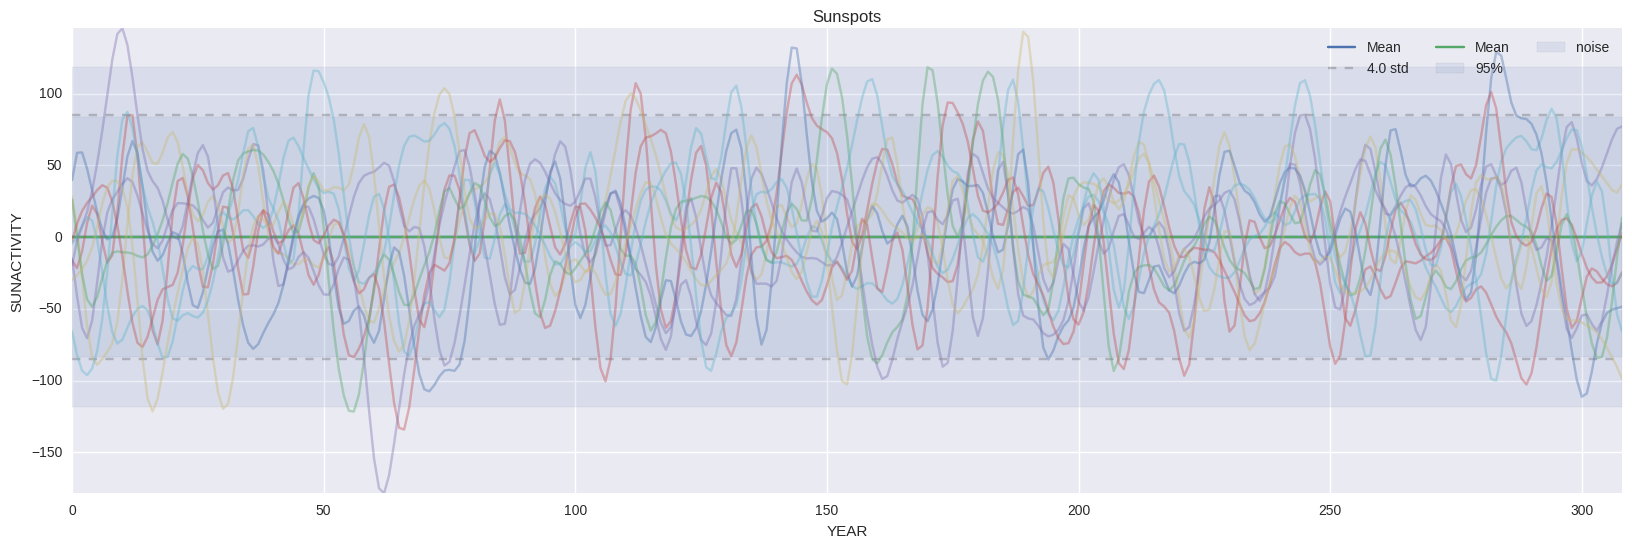

In [4]:
gp.plot(samples=10, data=False, prior=True)

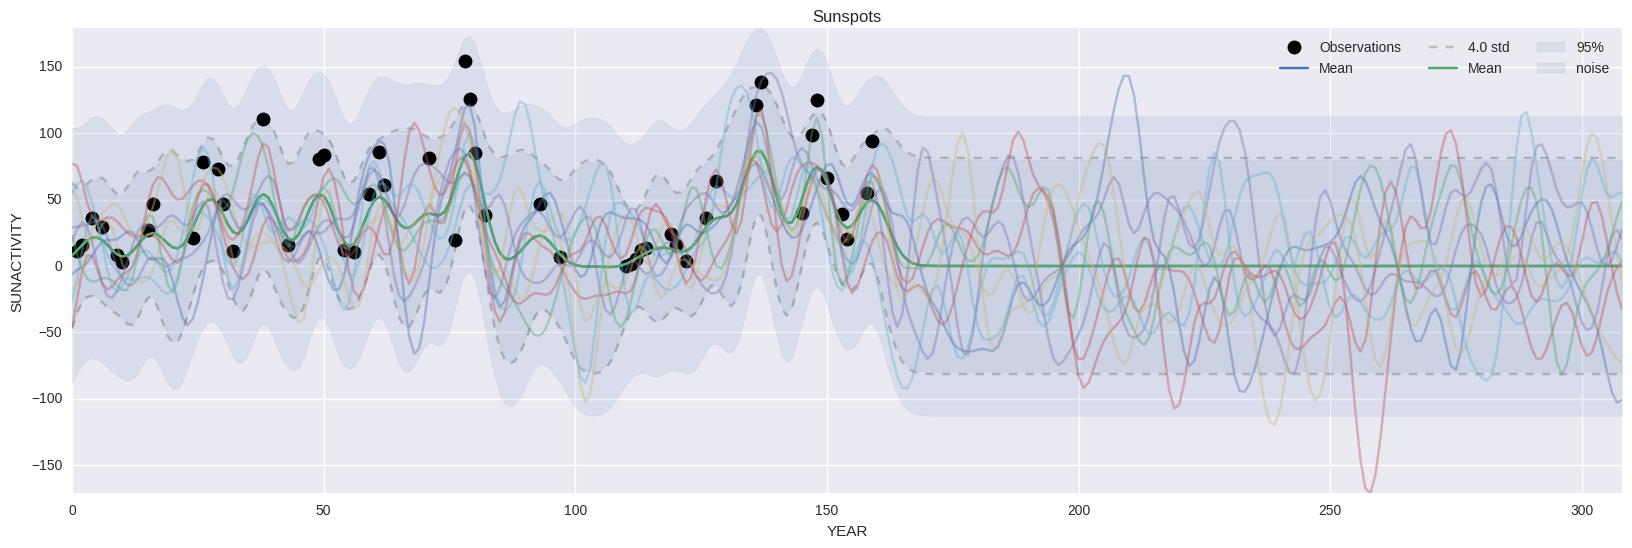

In [5]:
gp.observed(x_obs[:50], y_obs[:50])
gp.plot(samples=10)

Starting function value (-logp): 249.524


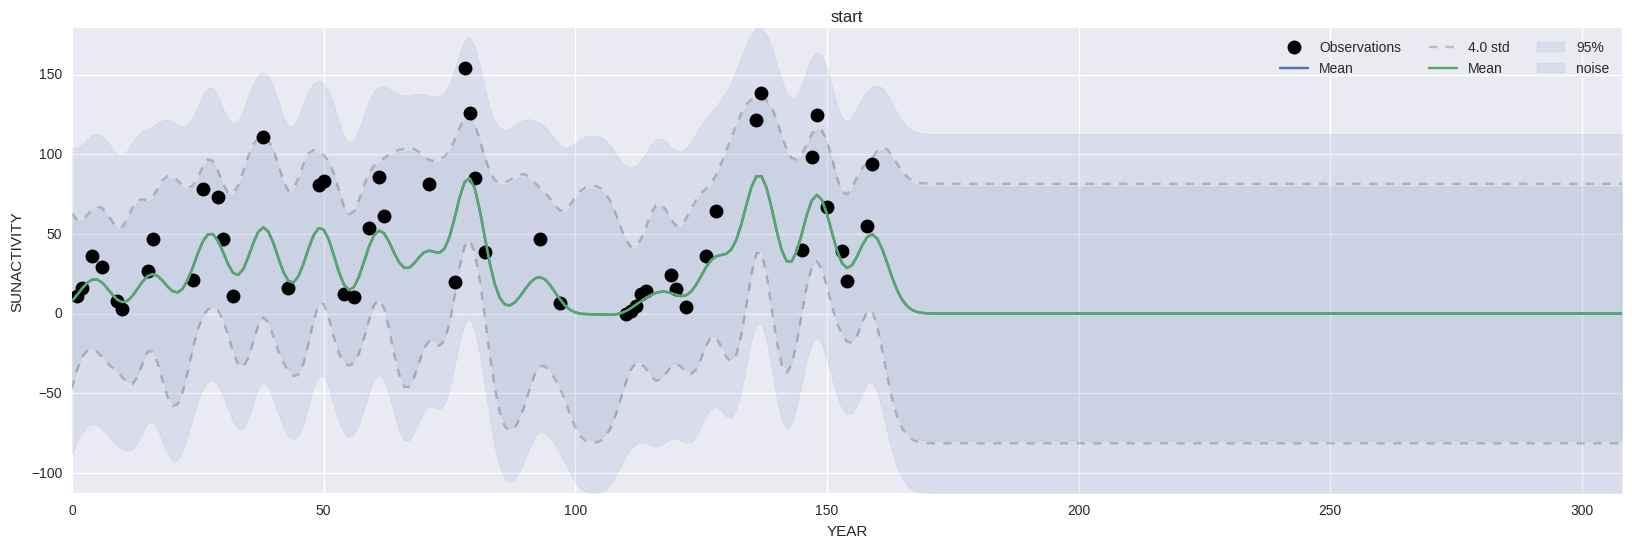


start_bfgs
         Current function value: 239.708603
         Iterations: 12
         Function evaluations: 165
         Gradient evaluations: 152


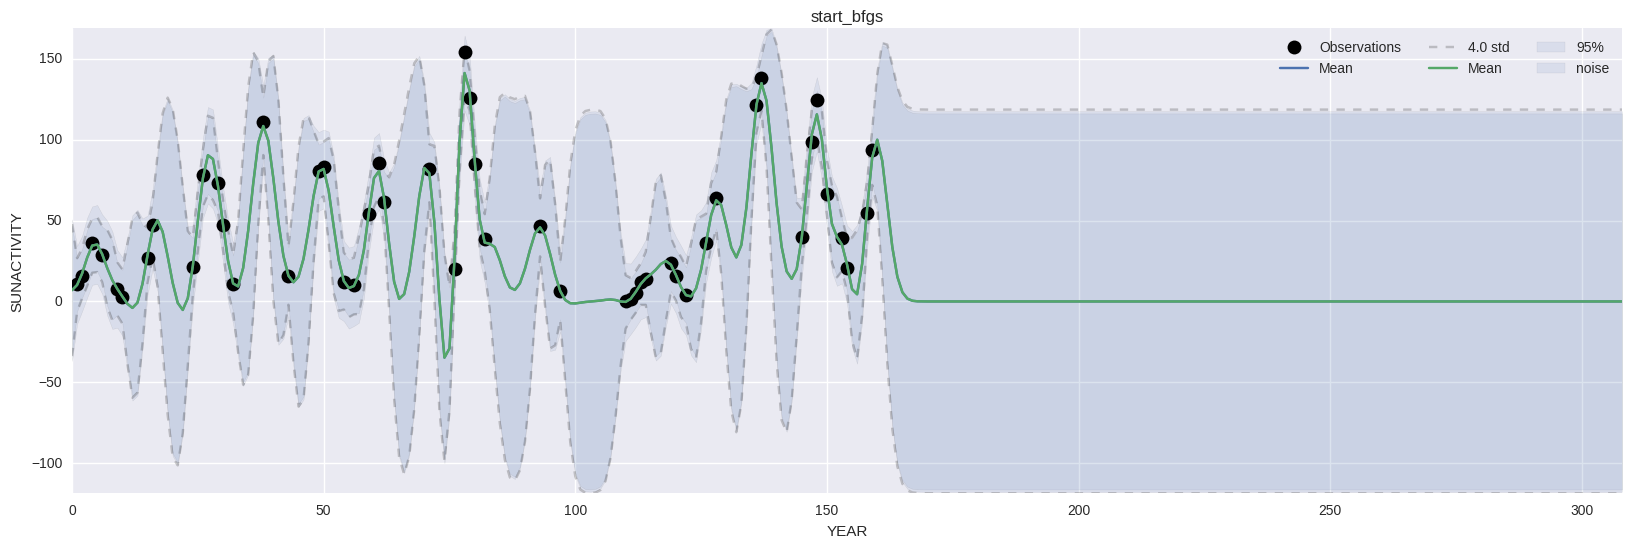


start_powell
Optimization terminated successfully.
         Current function value: 239.710037
         Iterations: 3
         Function evaluations: 121


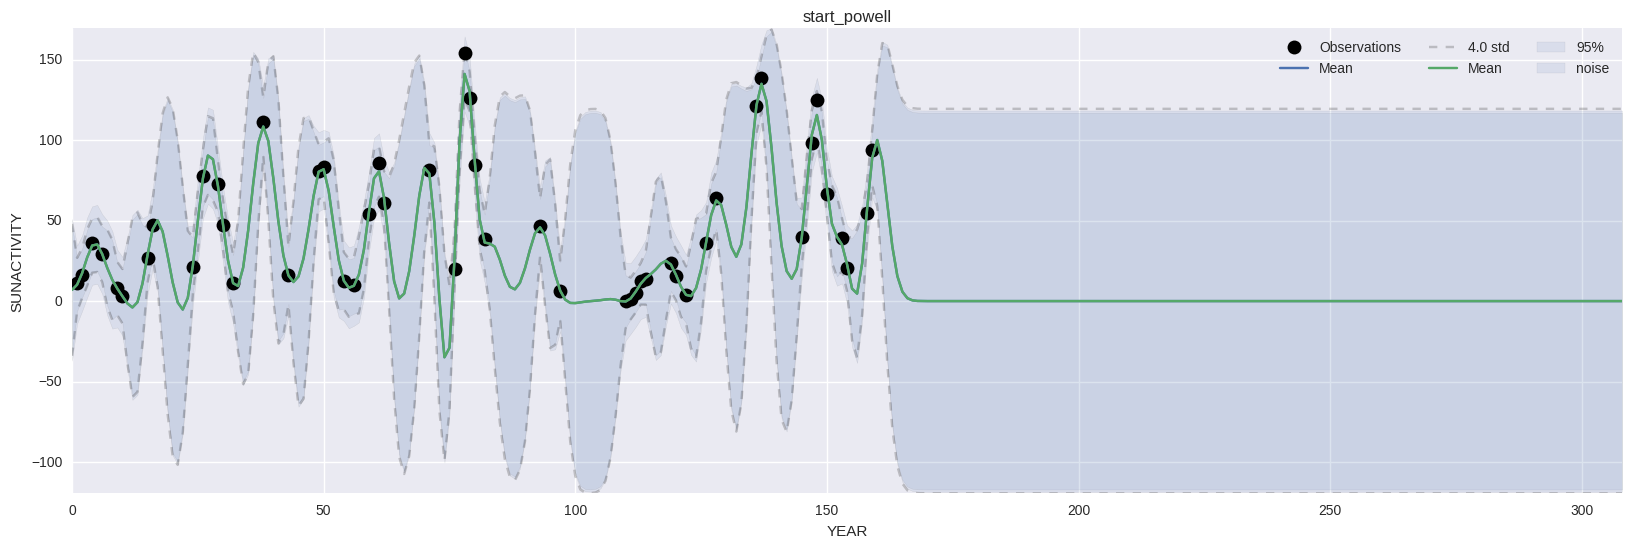

In [6]:
params = gp.find_MAP(points=2, plot=True)

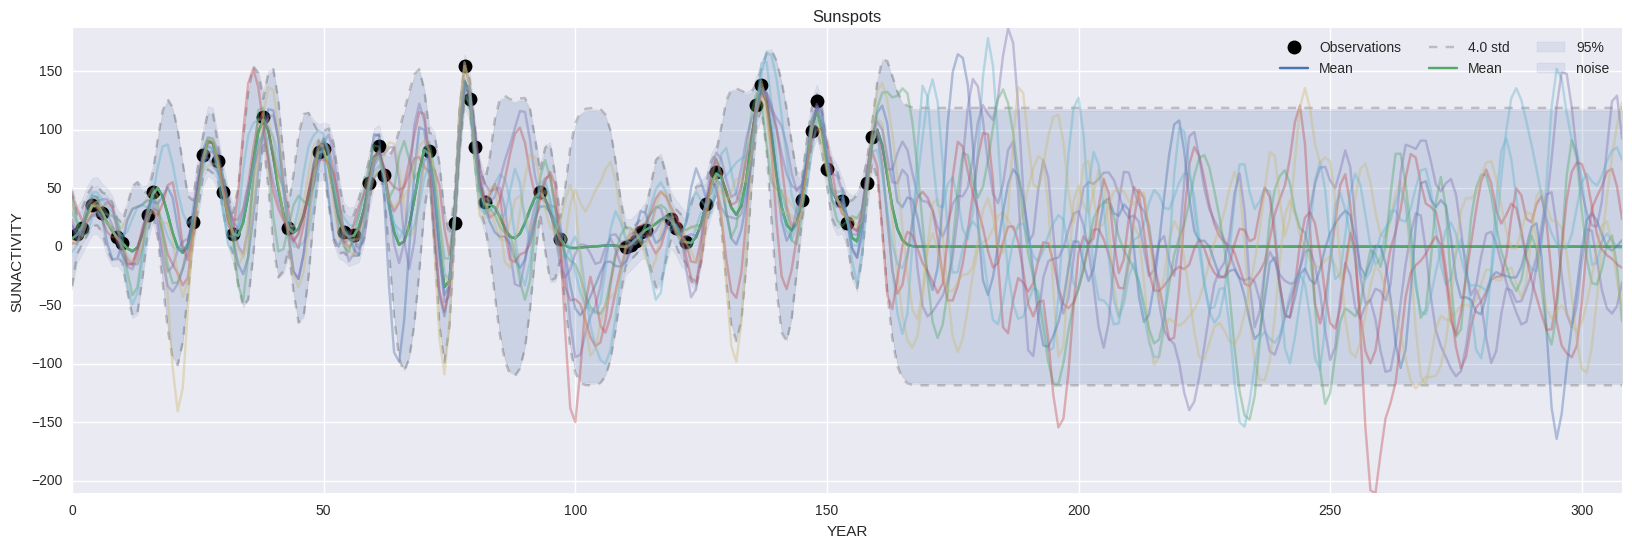

In [7]:
gp.set_params(params)
gp.plot(samples=10)

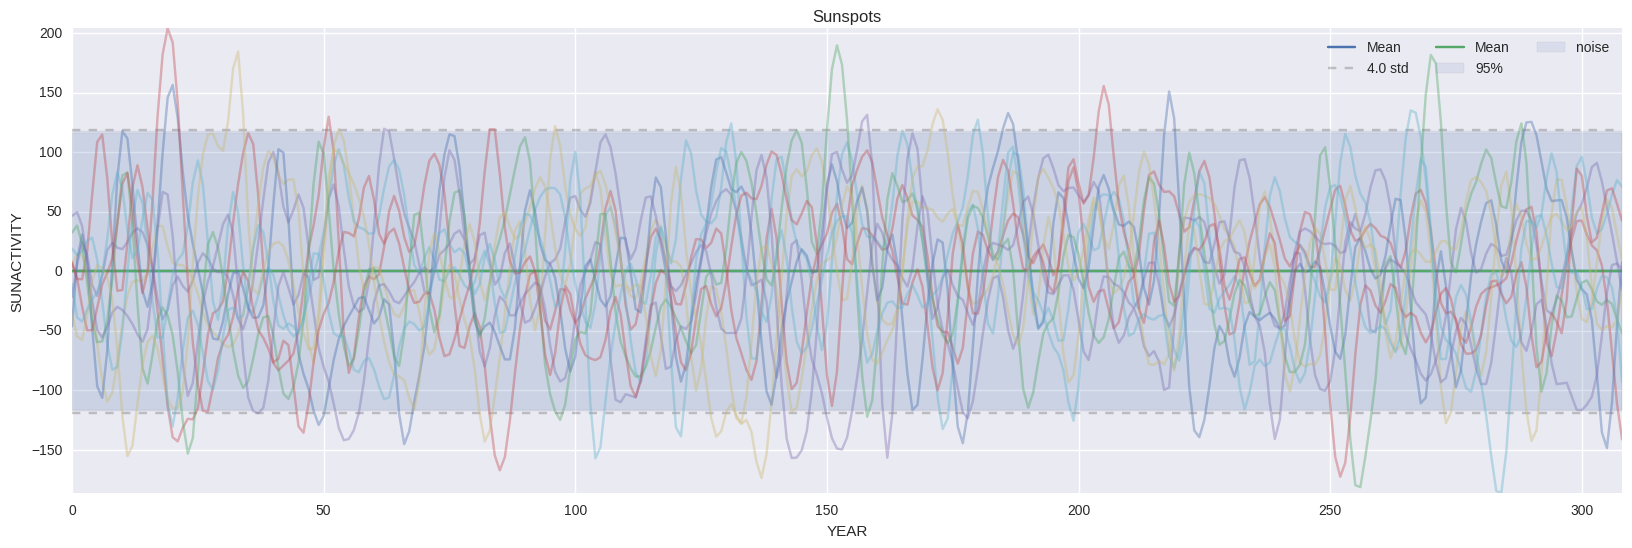

In [8]:
gp.plot(samples=10, data=False, prior=True)

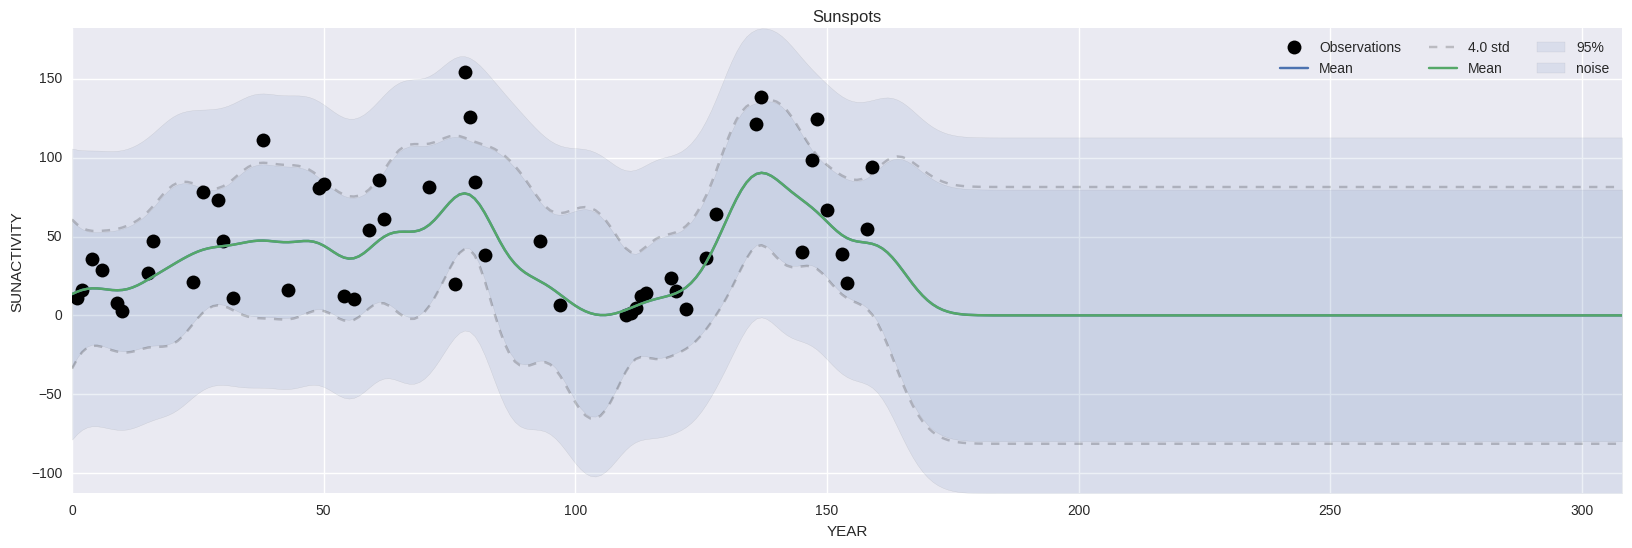

In [10]:
gp.widget_params()

In [11]:
gp.set_params(gp.get_params_widget())

In [12]:
gp.get_params_current()

{'GaussianProcess_Noise_Var_log_': array(7.412323474884033, dtype=float32),
 'GaussianProcess_SE_ARD_L2_Scales_log_': array([ 1.79999995], dtype=float32),
 'GaussianProcess_SE_Var_log_': array(7.412323474884033, dtype=float32)}

In [13]:
gp.set_params(gp.get_params_default())

In [14]:
gp.get_params_default()

{'GaussianProcess_Noise_Var_log_': array(7.412323474884033, dtype=float32),
 'GaussianProcess_SE_ARD_L2_Scales_log_': array([ 1.1707747], dtype=float32),
 'GaussianProcess_SE_Var_log_': array(7.412323474884033, dtype=float32)}

In [15]:
widget_params = gp.get_params_widget()
widget_params

{'GaussianProcess_Noise_Var_log_': array(7.412323474884033, dtype=float32),
 'GaussianProcess_SE_ARD_L2_Scales_log_': array([ 1.79999995], dtype=float32),
 'GaussianProcess_SE_Var_log_': array(7.412323474884033, dtype=float32)}

In [16]:
widget_params.pop('GaussianProcess_Noise_Var_log_')
widget_params.pop('GaussianProcess_SE_Var_log_')

widget_params

{'GaussianProcess_SE_ARD_L2_Scales_log_': array([ 1.79999995], dtype=float32)}

In [17]:
gp.fix_params(widget_params)

In [18]:
gp.fix_params({})

In [19]:
tgp = g3.TransformedGaussianProcess(x, g3.Zero(), g3.SE(x), g3.BoxCoxShifted(y))

Space Dimensions:  (309, 1)
Definition OK
Compilation OK


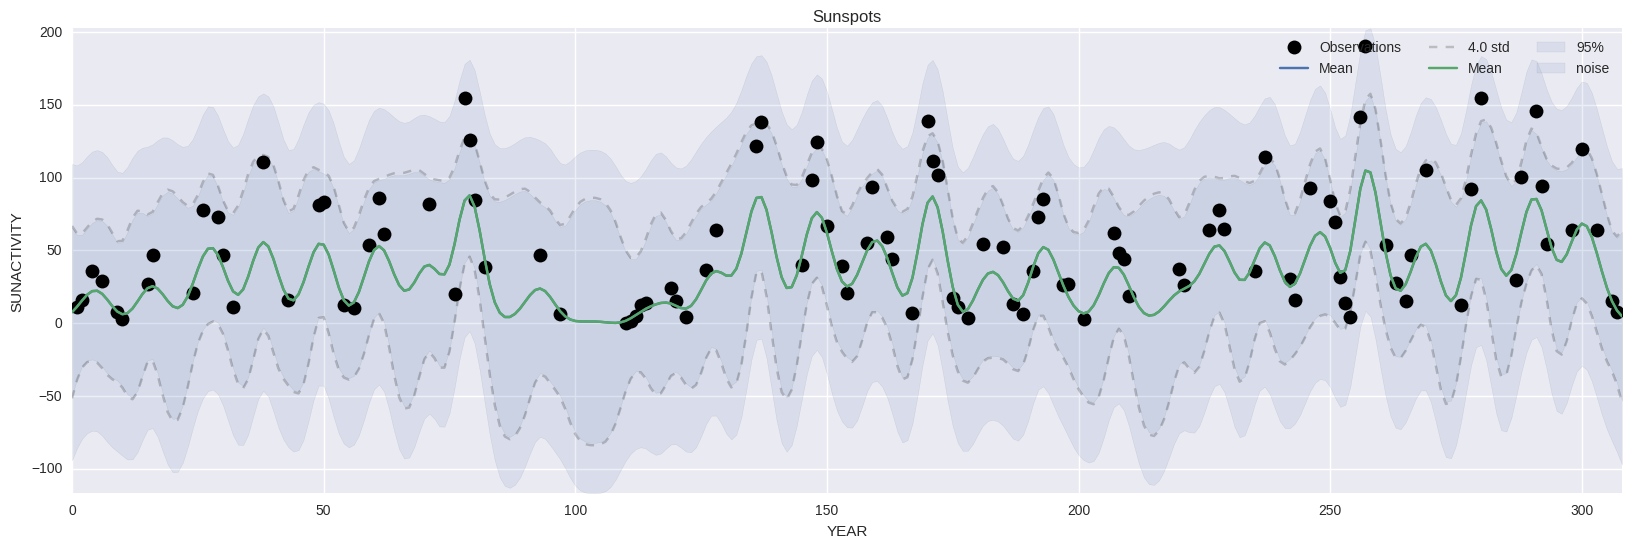

In [20]:
tgp.describe('Sunspots','YEAR','SUNACTIVITY')
tgp.observed(x_obs, y_obs)
tgp.plot()

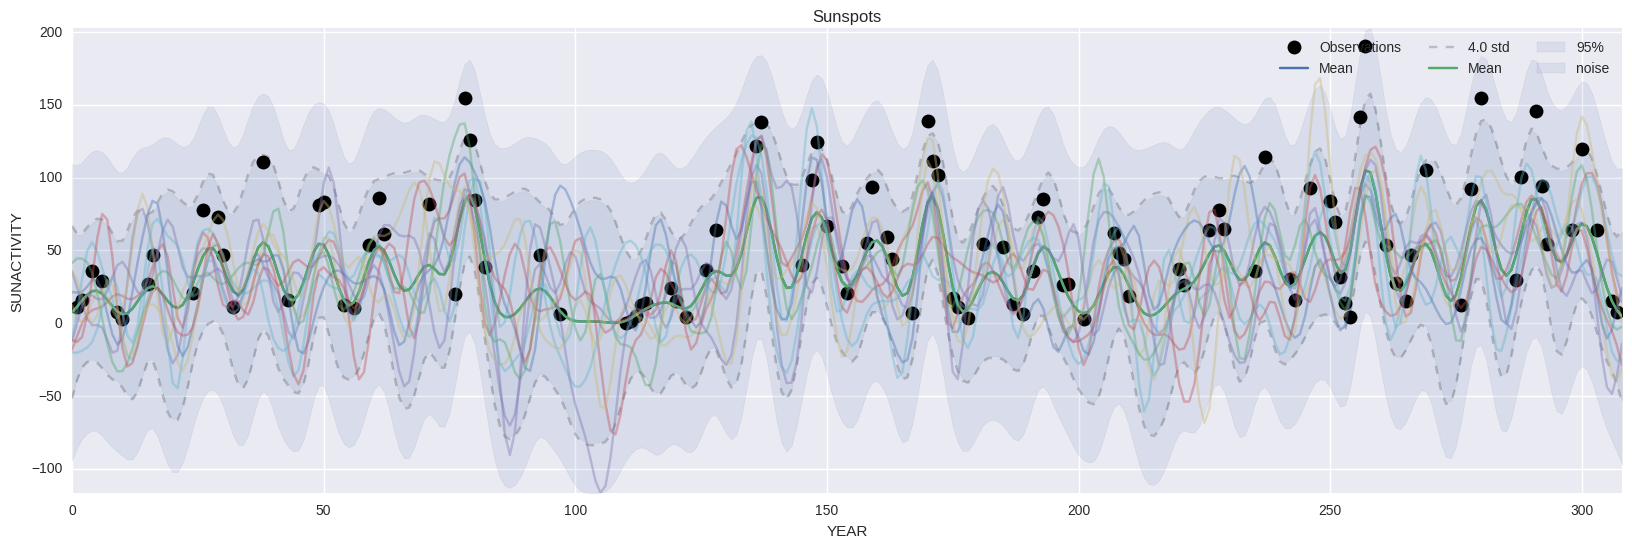

In [21]:
tgp.plot(samples=10)

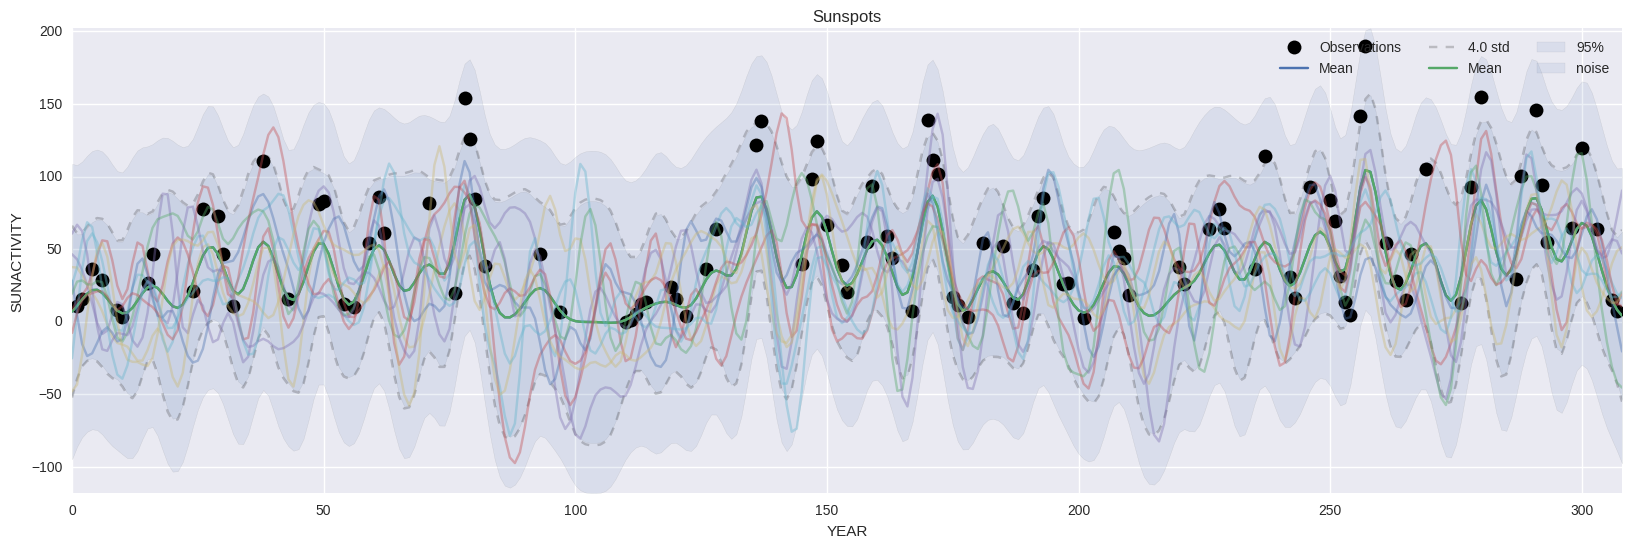

In [22]:
gp.observed(x_obs, y_obs)
gp.set_params(gp.get_params_default())
gp.plot(samples=10)

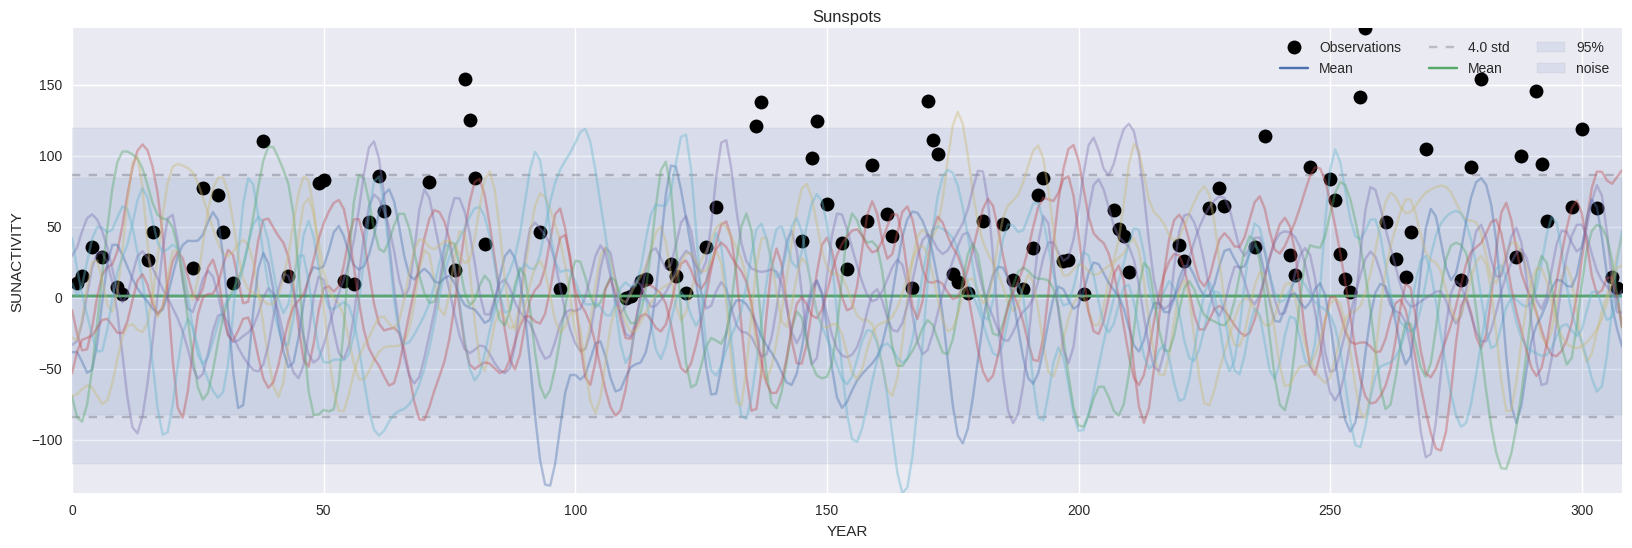

In [23]:
tgp.plot(prior=True, samples=10)

In [24]:
gp.get_params_current()

{'GaussianProcess_Noise_Var_log_': array(7.505817890167236, dtype=float32),
 'GaussianProcess_SE_ARD_L2_Scales_log_': array([ 1.05075622], dtype=float32),
 'GaussianProcess_SE_Var_log_': array(7.505817890167236, dtype=float32)}

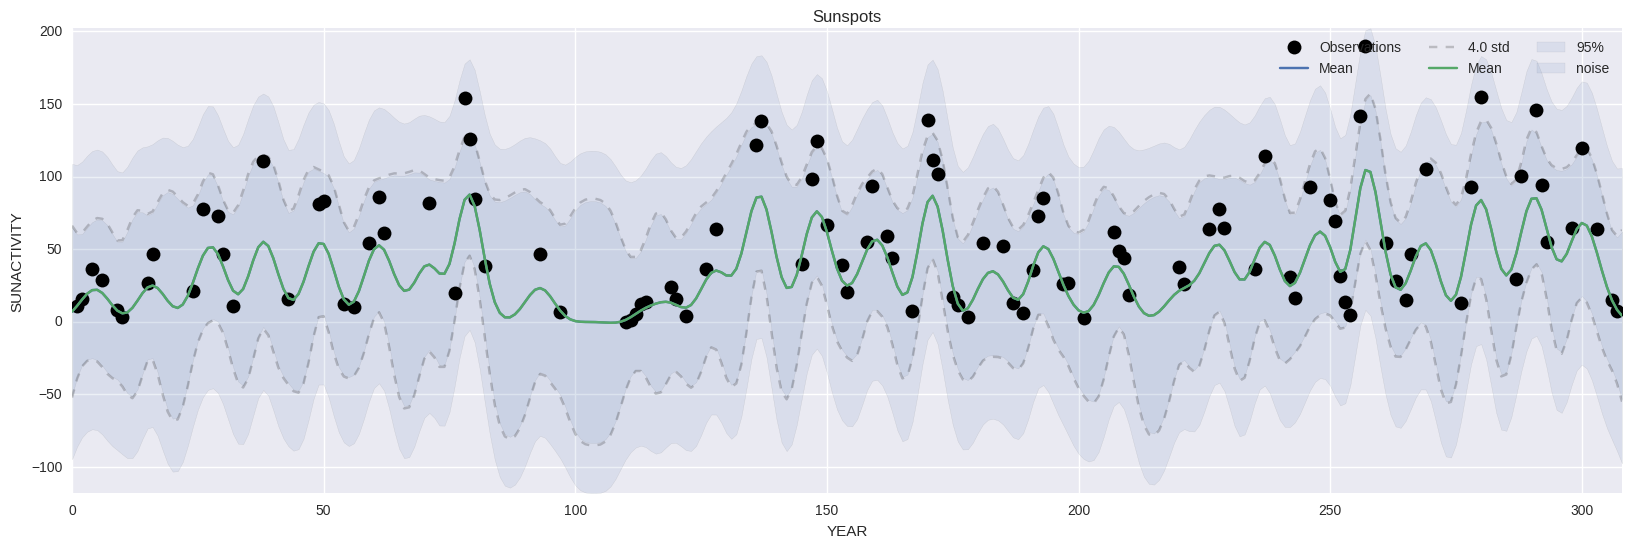

In [25]:
gp.plot()

In [26]:
tgp.get_params_current()

{'TransformedGaussianProcess_BoxCoxShifted_power_log_': array(0.0, dtype=float32),
 'TransformedGaussianProcess_BoxCoxShifted_shift': array(-0.5, dtype=float32),
 'TransformedGaussianProcess_Noise_Var_log_': array(7.505817890167236, dtype=float32),
 'TransformedGaussianProcess_SE_ARD_L2_Scales_log_': array([ 1.05075622], dtype=float32),
 'TransformedGaussianProcess_SE_Var_log_': array(7.505817890167236, dtype=float32)}

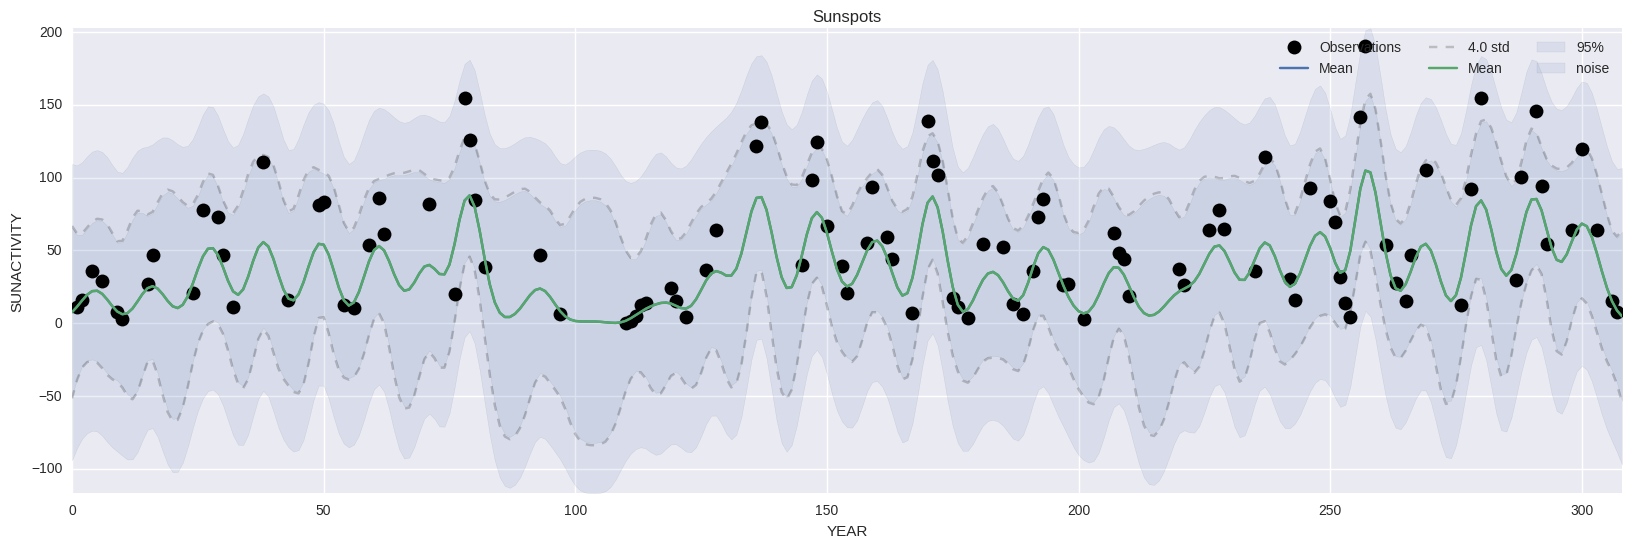

In [27]:
tgp.plot()

In [28]:
traces = tgp.sample_hypers(advi=False)

100%|██████████| 1000/1000 [01:01<00:00, 16.19it/s]


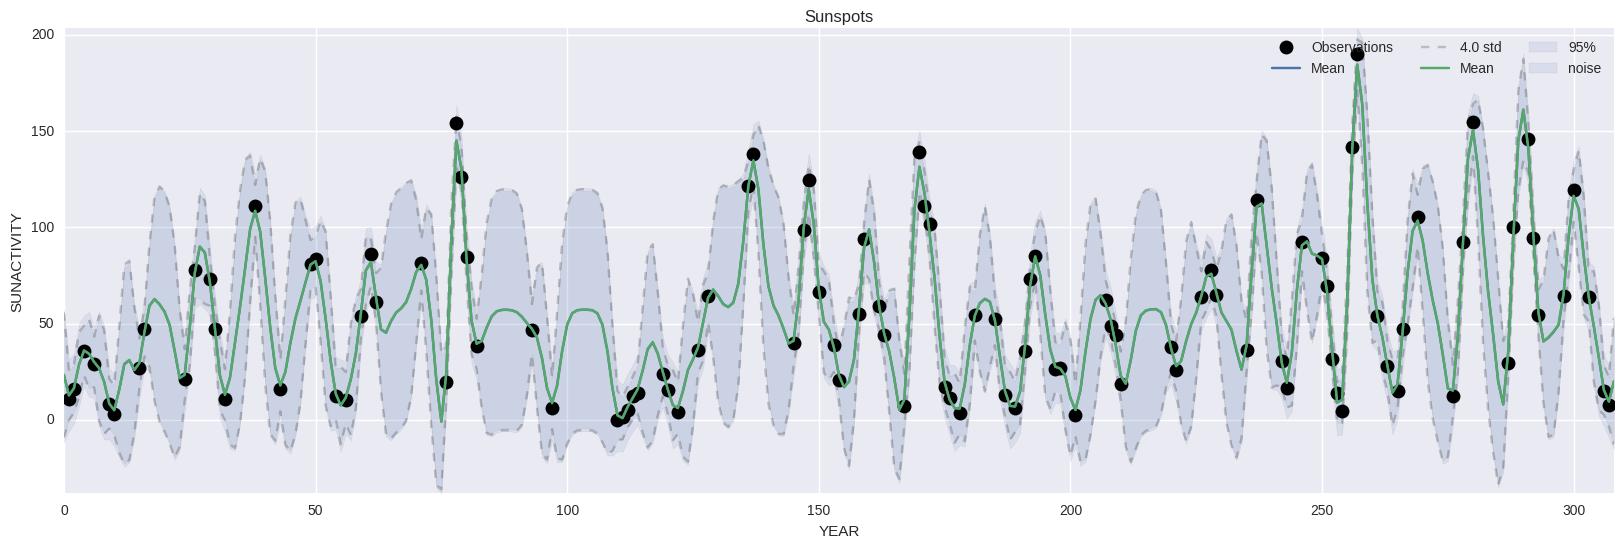

In [35]:
tgp.widget_traces(traces)

In [50]:
tgp2 = g3.TransformedGaussianProcess(x, g3.Bias(), g3.SM(x), g3.BoxCoxShifted(y))

Space Dimensions:  (309, 1)
Definition OK
Compilation OK


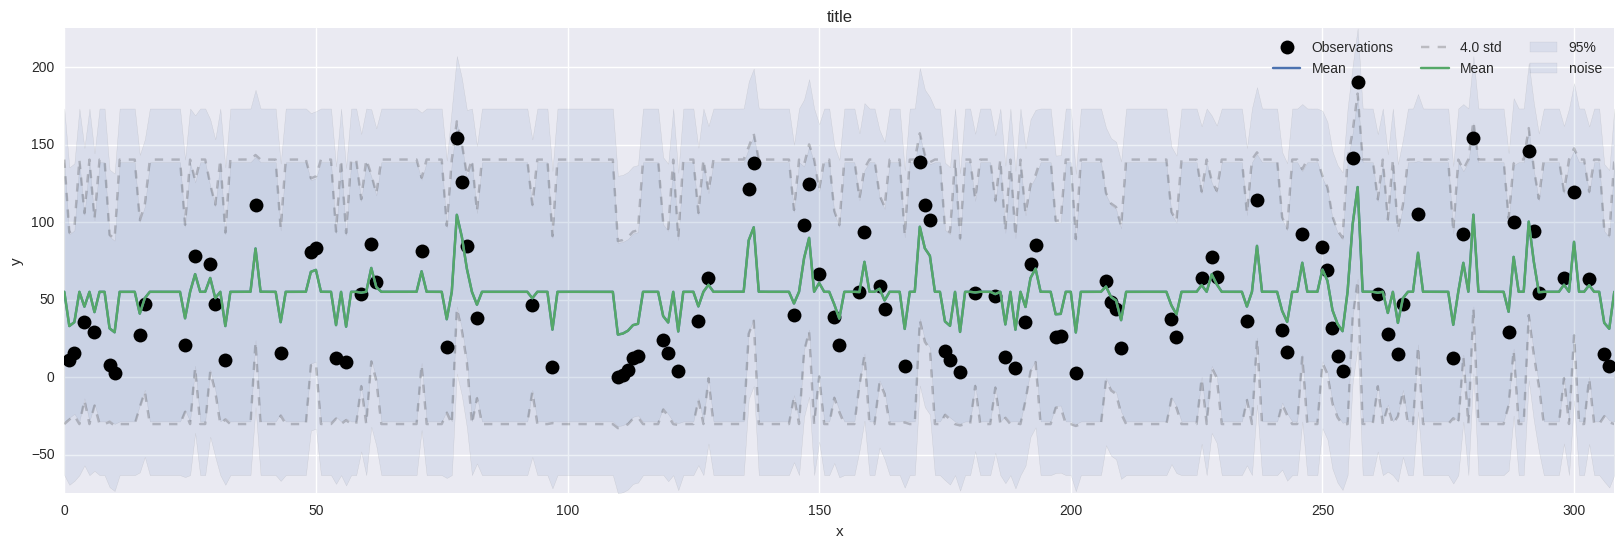

In [51]:
tgp2.observed(x_obs, y_obs)
tgp2.plot()

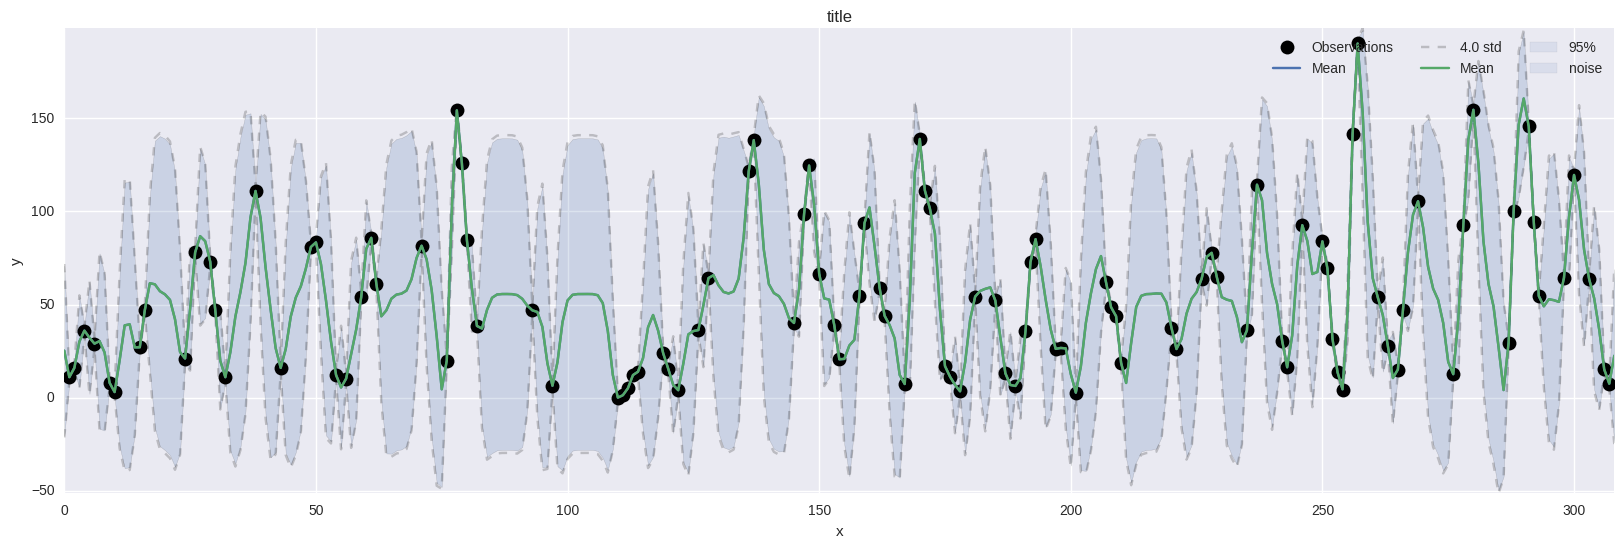

In [53]:
tgp2.widget_params()

In [54]:
tgp2.set_params(tgp2.get_params_widget())

Starting function value (-logp): 511.515792489


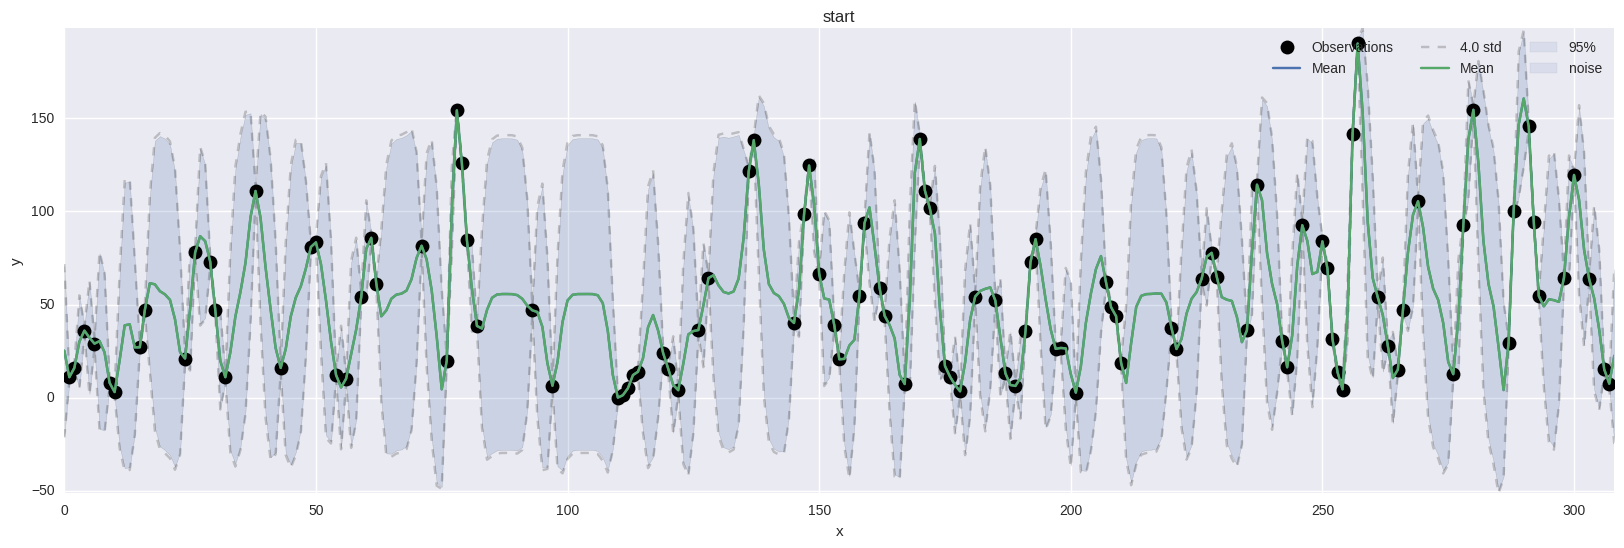


start_bfgs
         Current function value: 444.781421
         Iterations: 11
         Function evaluations: 35
         Gradient evaluations: 25


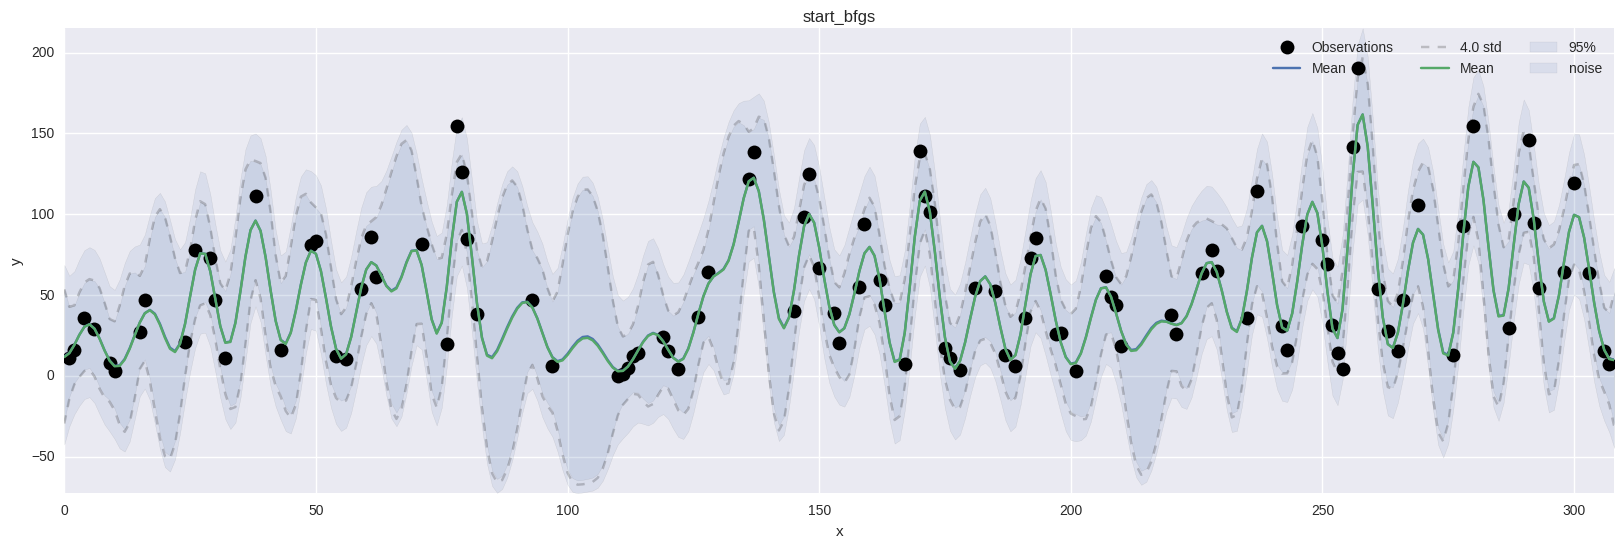


start_powell
Optimization terminated successfully.
         Current function value: 394.600419
         Iterations: 14
         Function evaluations: 2076


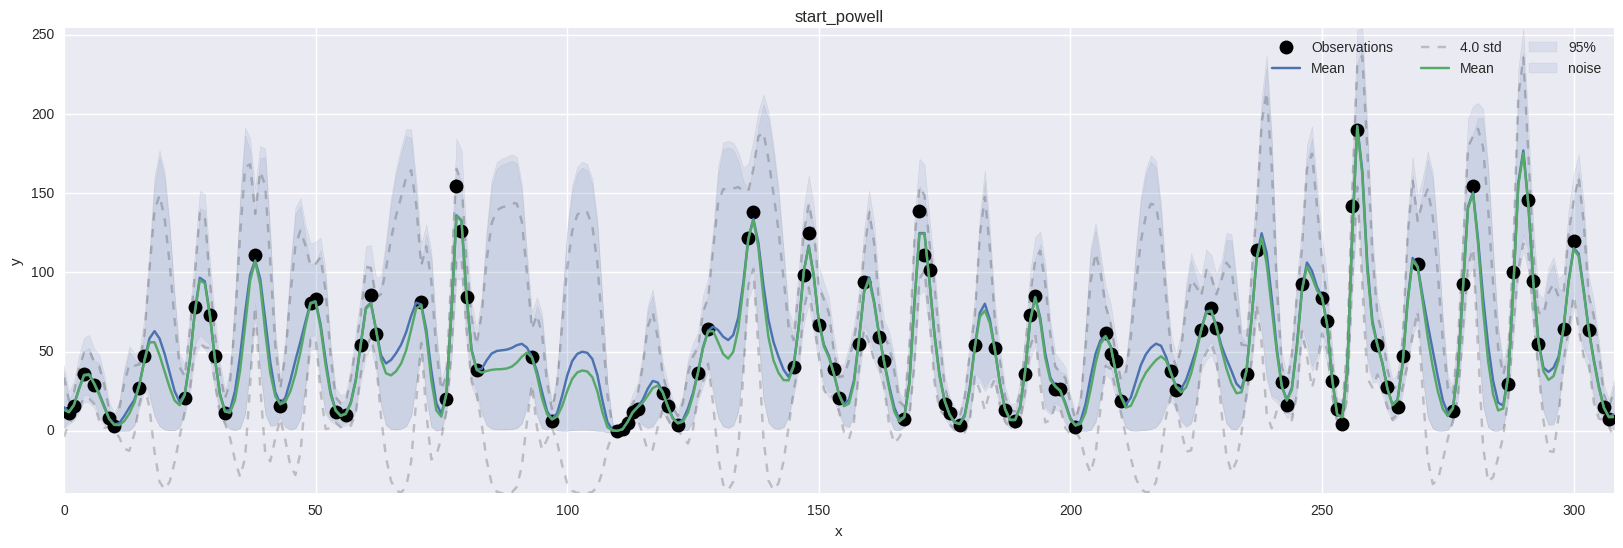


start_bfgs_bfgs
         Current function value: 419.809255
         Iterations: 8
         Function evaluations: 32
         Gradient evaluations: 24


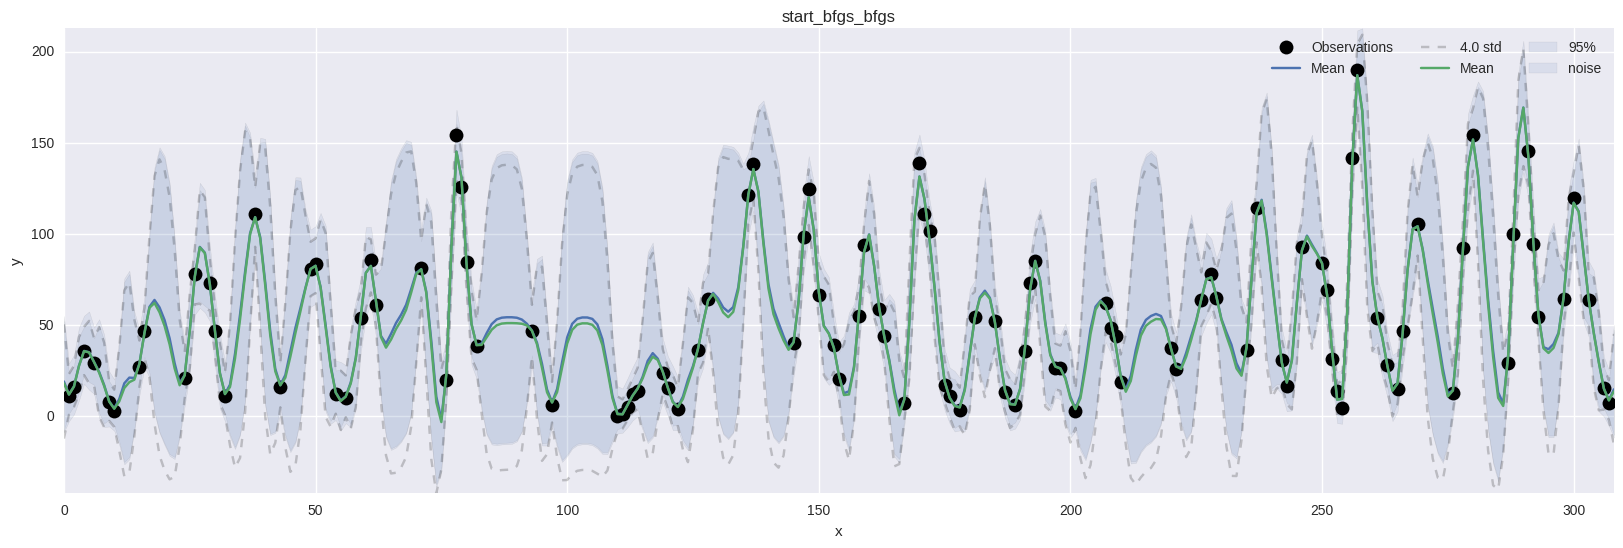


start_bfgs_powell
Optimization terminated successfully.
         Current function value: 404.645869
         Iterations: 8
         Function evaluations: 1079


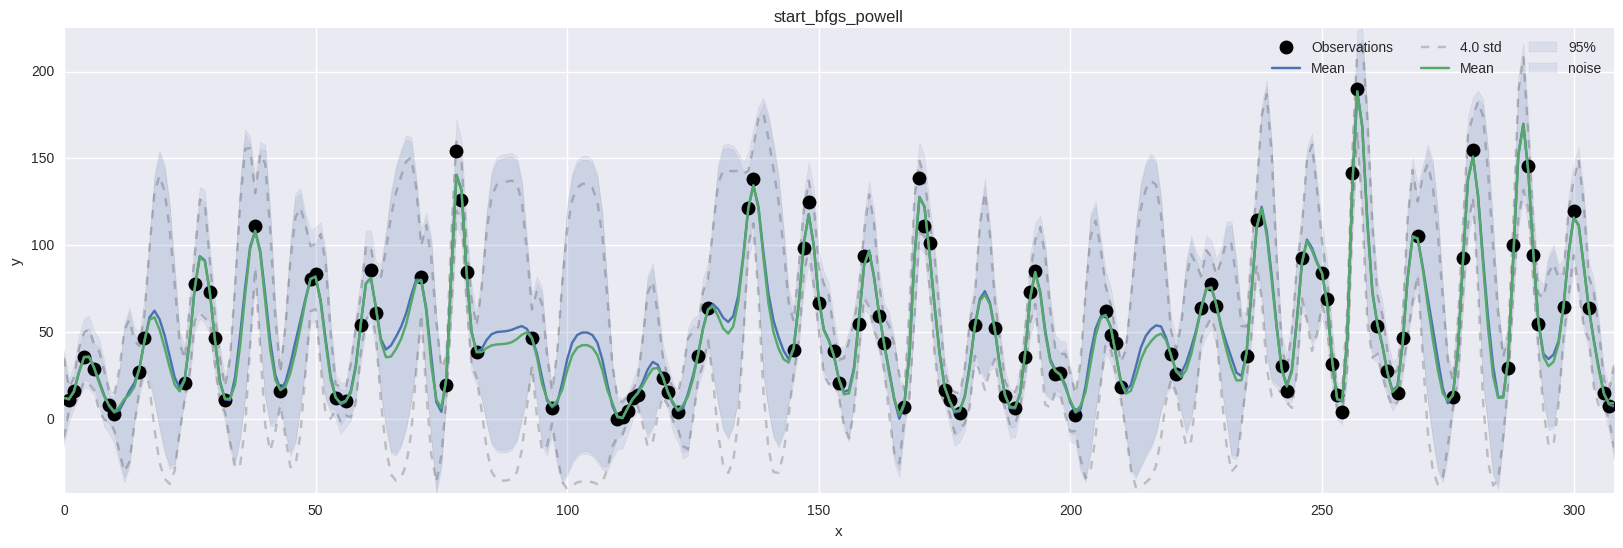

In [58]:
params = tgp2.find_MAP(points=4, plot=True)

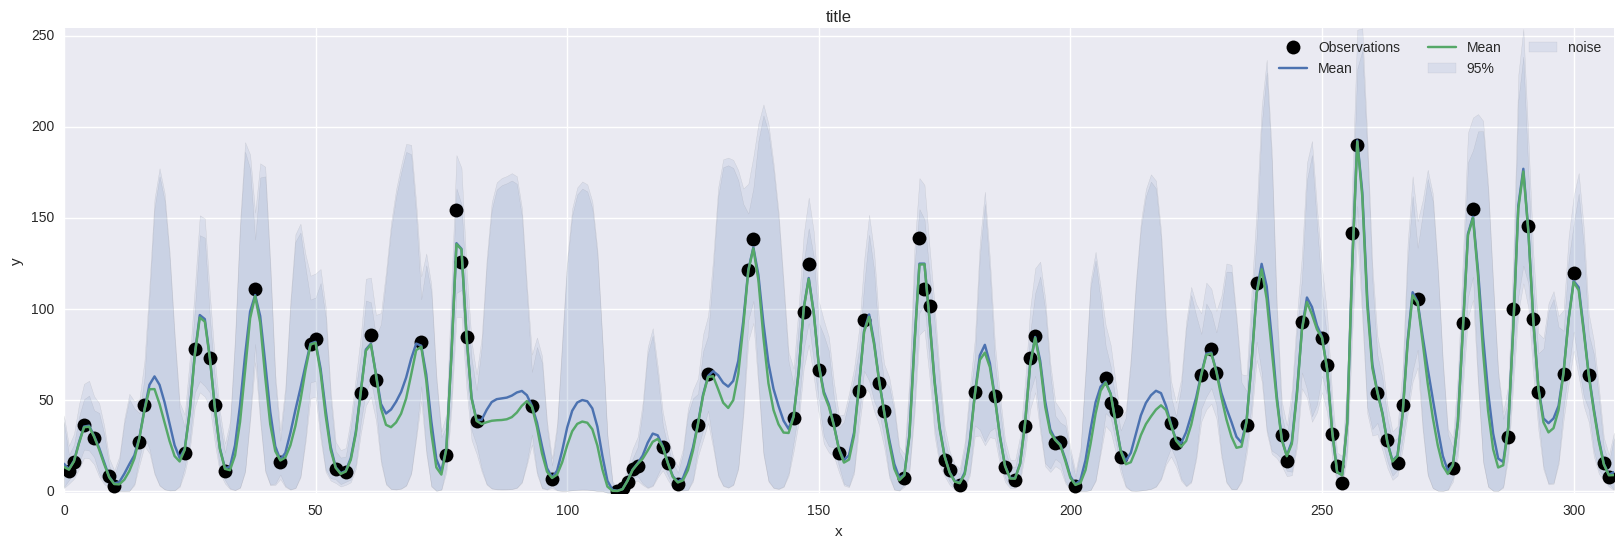

In [60]:
tgp2.plot(params, var=False)

In [ ]:
traces = tgp2.sample_hypers(start=params)

Average ELBO = nan:  27%|██▋       | 5414/20000 [00:46<01:42, 141.86it/s]